# Parameters

In [9]:
REGION_NAMES = ['GRASS', 'SIDEWALK', 'BUILDING', 'GRAVEL']

REFERENCE_MISSION = 2

# Imports and Functions

In [10]:
import copy
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

In [11]:
def plot_images(image_list, title_list=[], grid='off'):
    fig, axes = plt.subplots(nrows=1, ncols=len(image_list), figsize=(10*len(image_list), 10*1))
    if len(image_list) == 1:
        axes = [axes]

    for i, ax in enumerate(axes):
        ax.imshow(cv2.cvtColor(image_list[i], cv2.COLOR_BGR2RGB))
        if len(title_list) > 0:
            ax.set_title(title_list[i])
        ax.axis(grid)

In [12]:
def plot_mission_region_sample_images(mission_numbers, mission_images=[], region_images=[], sample_images=[], display_missions=True, display_regions=True, display_samples=True):
    if display_missions:
        if len(mission_images) > 0:
            print('Displaying missions')
            plot_images(mission_images, ['Mission ' + str(mission_number) for mission_number in mission_numbers])
        else:
            print('[Error] No mission images available to display')
    
    if display_regions:
        if len(region_images) > 0:
            print('Displaying regions')
            plot_images(region_images, ['Region ' + str(mission_number) for mission_number in mission_numbers])
        else:
            print('[Error] No region images available to display')
    
    if display_samples:
        if len(sample_images) > 0:
            print('Displaying samples')
            plot_images(sample_images, ['Sample ' + str(mission_number) for mission_number in mission_numbers])
        else:
            print('[Error] No sample images available to display')

In [13]:
def get_mission_file_path(mission_number):
    return '..\\missions\\mission_' + str(mission_number) + '\\mission_' + str(mission_number) + '_'

In [14]:
def get_global_image(mission_number, get_normalized=True):
    if get_normalized:
        mission = np.load(get_mission_file_path(mission_number) + 'normalized_image.npy')
    else:
        mission = np.load(get_mission_file_path(mission_number) + 'aligned_image.npy')
    
    return mission

In [15]:
def get_region_and_sample_image(mission_number, region_name, get_normalized=True):
    if get_normalized:
        region = np.load(get_mission_file_path(mission_number) + 'normalized_region_image_' + region_name + '.npy')
        sample = np.load(get_mission_file_path(mission_number) + 'normalized_sample_image_' + region_name + '.npy')
    else:
        region = np.load(get_mission_file_path(mission_number) + 'aligned_region_image_' + region_name + '.npy')
        sample = np.load(get_mission_file_path(mission_number) + 'aligned_sample_image_' + region_name + '.npy')
    
    return region, sample

# Start

In [21]:
# load mission images, region images, sample images for given missions and a region

# select mission numbers and region type
mission_numbers = [2, 3, 4, 5, 6]
region_type = 'GRASS'
get_normalized = True

In [22]:
mission_images = []
region_images = []
sample_images = []

for mission_number in mission_numbers:
    if not os.path.isdir('..\\missions\\mission_' + str(mission_number)):
        print('[Error] Mission %d directory has not been created' % (mission_number))
        break
    
    # load mission images
    mission_image = get_global_image(mission_number, get_normalized)
    mission_images.append(mission_image)
    
    # load region images and sample images
    region_image, sample_image = get_region_and_sample_image(mission_number, region_type, get_normalized)
    region_images.append(region_image)
    sample_images.append(sample_image)

# all lengths and dimensions should match
print(len(mission_images))
print(mission_images[0].shape)
print(len(region_images))
print(region_images[0].shape)
print(len(sample_images))
print(sample_images[0].shape)

5
(543, 470, 3)
5
(543, 470, 3)
5
(543, 470, 3)


Displaying missions
Displaying regions
Displaying samples


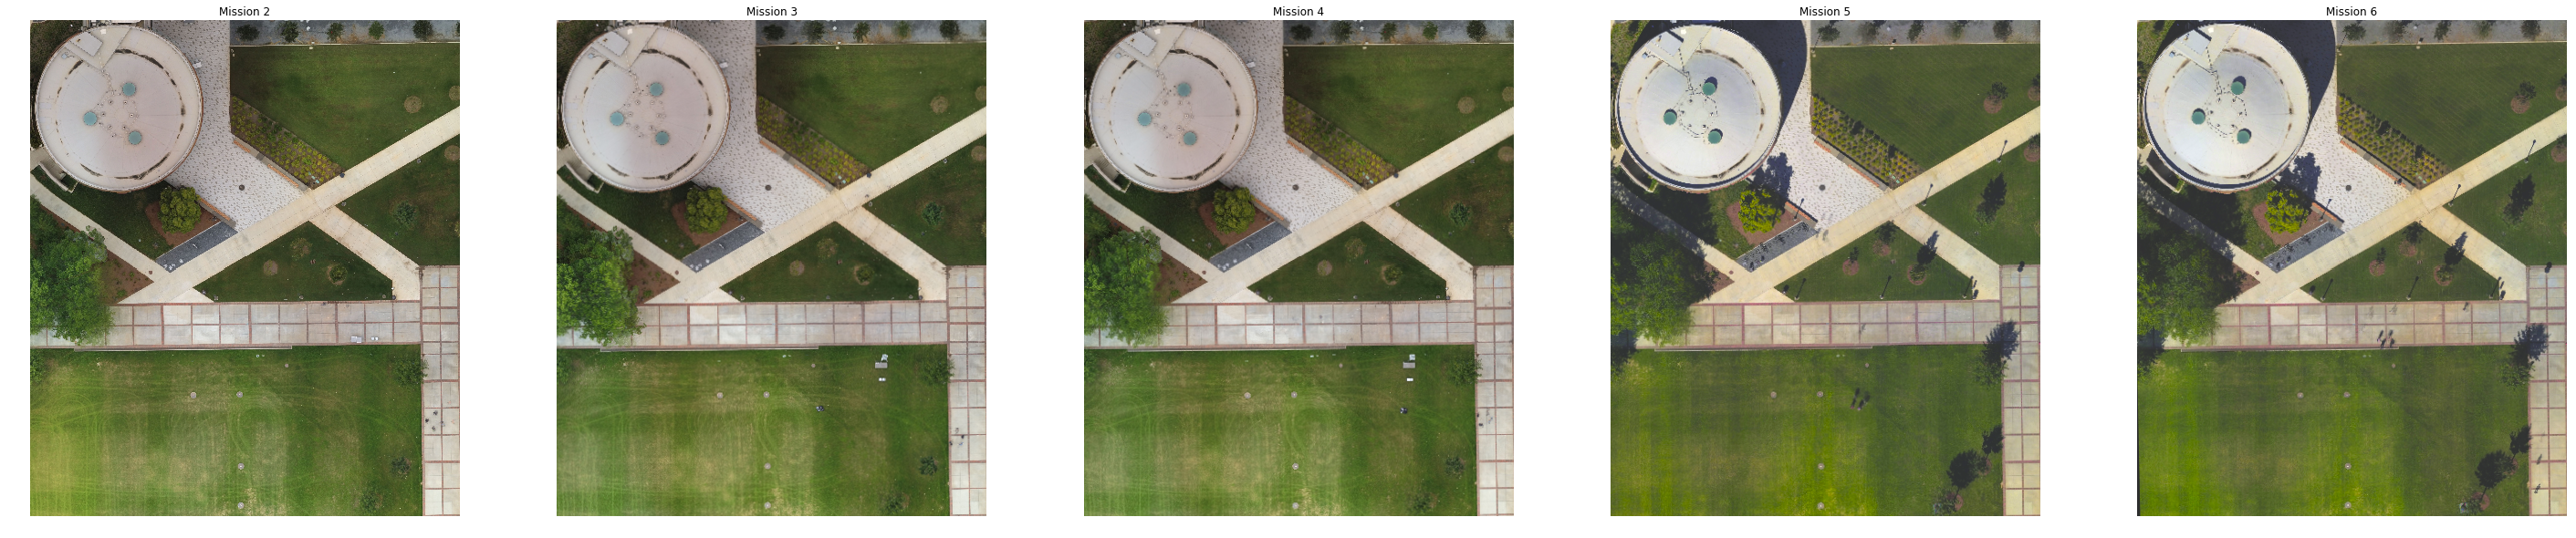

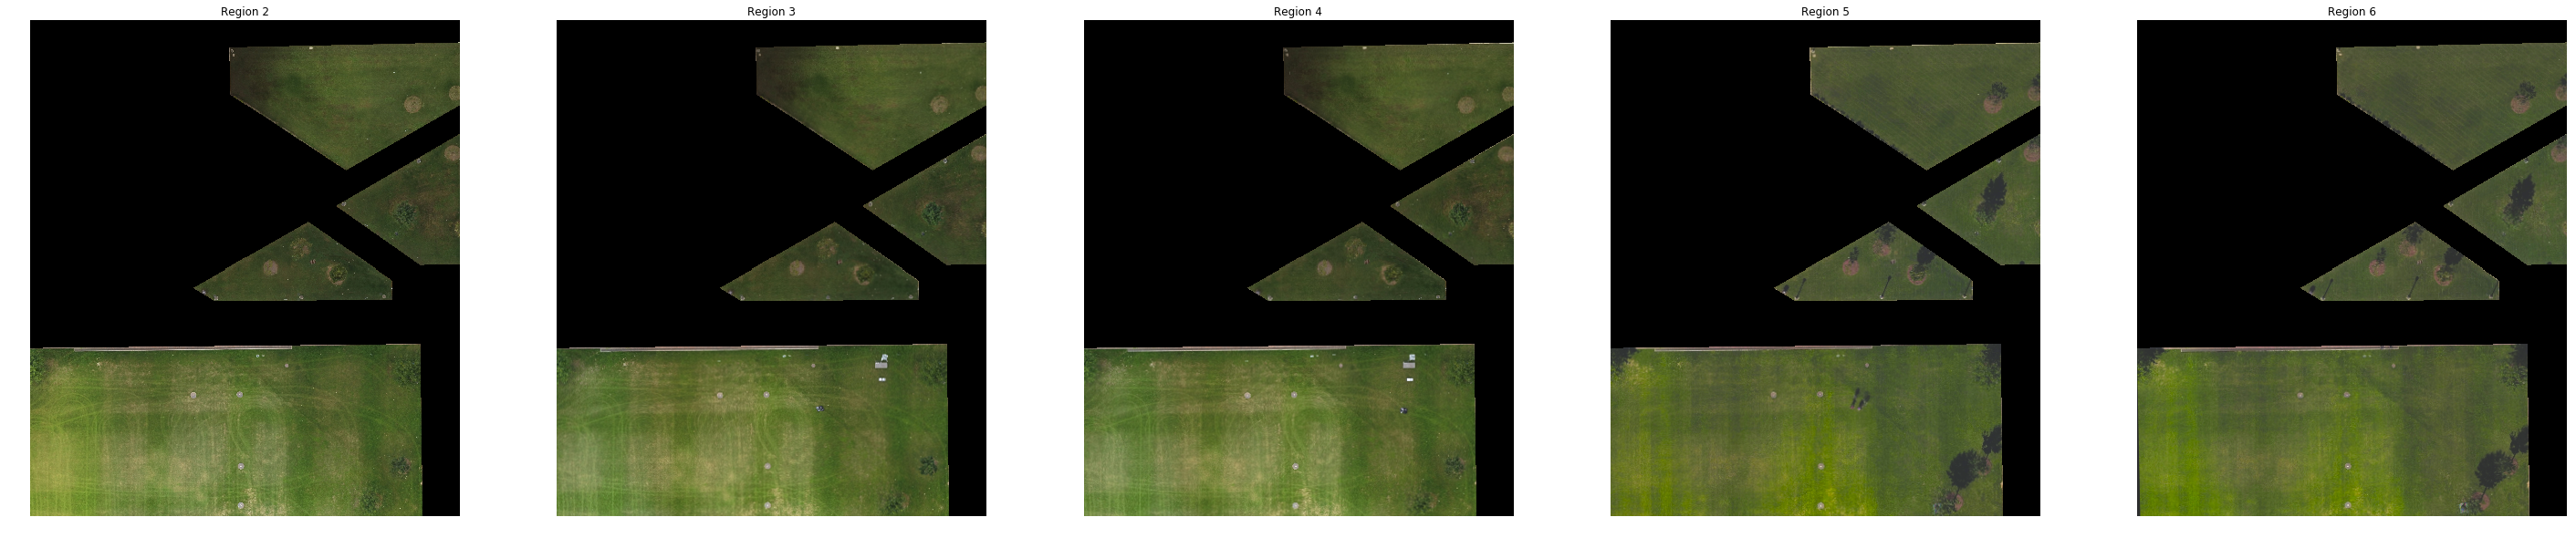

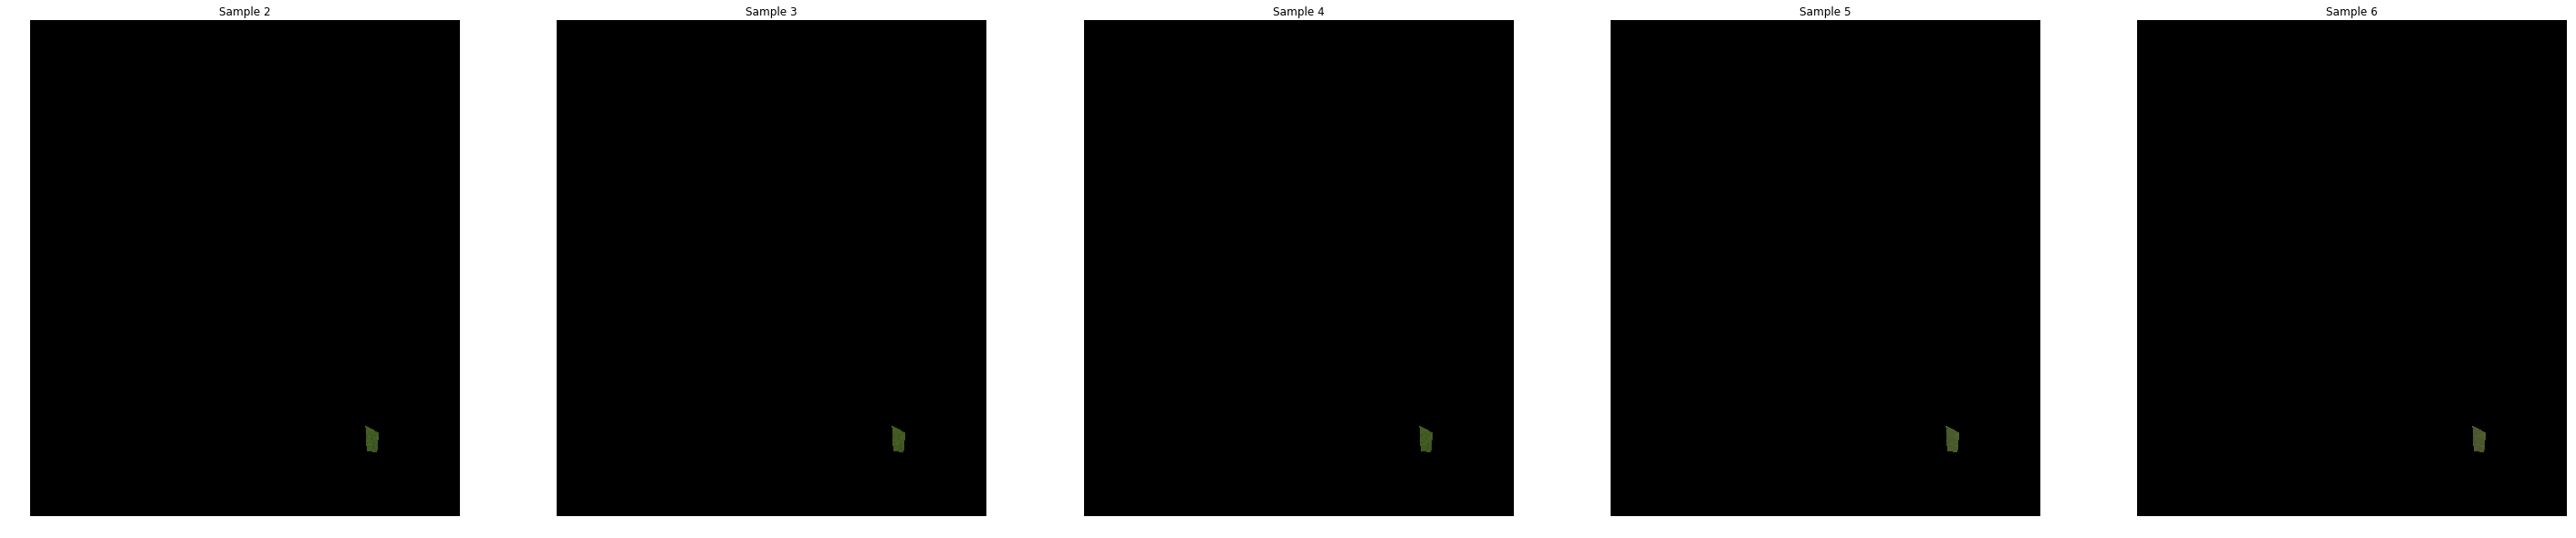

In [23]:
# display the mission images, region images, sample images
# don't change "mission_numbers, mission_images=mission_images, region_images=region_images, sample_images=sample_images"
# change "display_missions=True, display_regions=True, display_samples=True" to True or False depending on what you want displayed

plot_mission_region_sample_images(mission_numbers, mission_images=mission_images, region_images=region_images, sample_images=sample_images, display_missions=True, display_regions=True, display_samples=True)

In [7]:
#Image Averaging

###Still need to put images in a list!!!!

def compute_average(imlist):
  """  Compute the average of a list of images. """

  # open first image and make into array of type float
  averageim = array(Image.open(imlist[0]), 'f')

  for imname in imlist[1:]:
    try:
      averageim += array(Image.open(imname))
    except:
      print (imname + '...skipped')
  averageim /= len(imlist)

  # return average as uint8
  return array(averageim, 'uint8')

# Detect Anomalies

In [24]:
adjacent_regions_diff = []

THRESHOLD = 100

for i in range(0, len(mission_numbers)-1):
    diff = cv2.cvtColor(region_images[i], cv2.COLOR_BGR2GRAY) - cv2.cvtColor(region_images[i+1], cv2.COLOR_BGR2GRAY)

    threshold_mask = diff < THRESHOLD
    diff[threshold_mask] = 0

    adjacent_regions_diff.append(diff)

Displaying regions


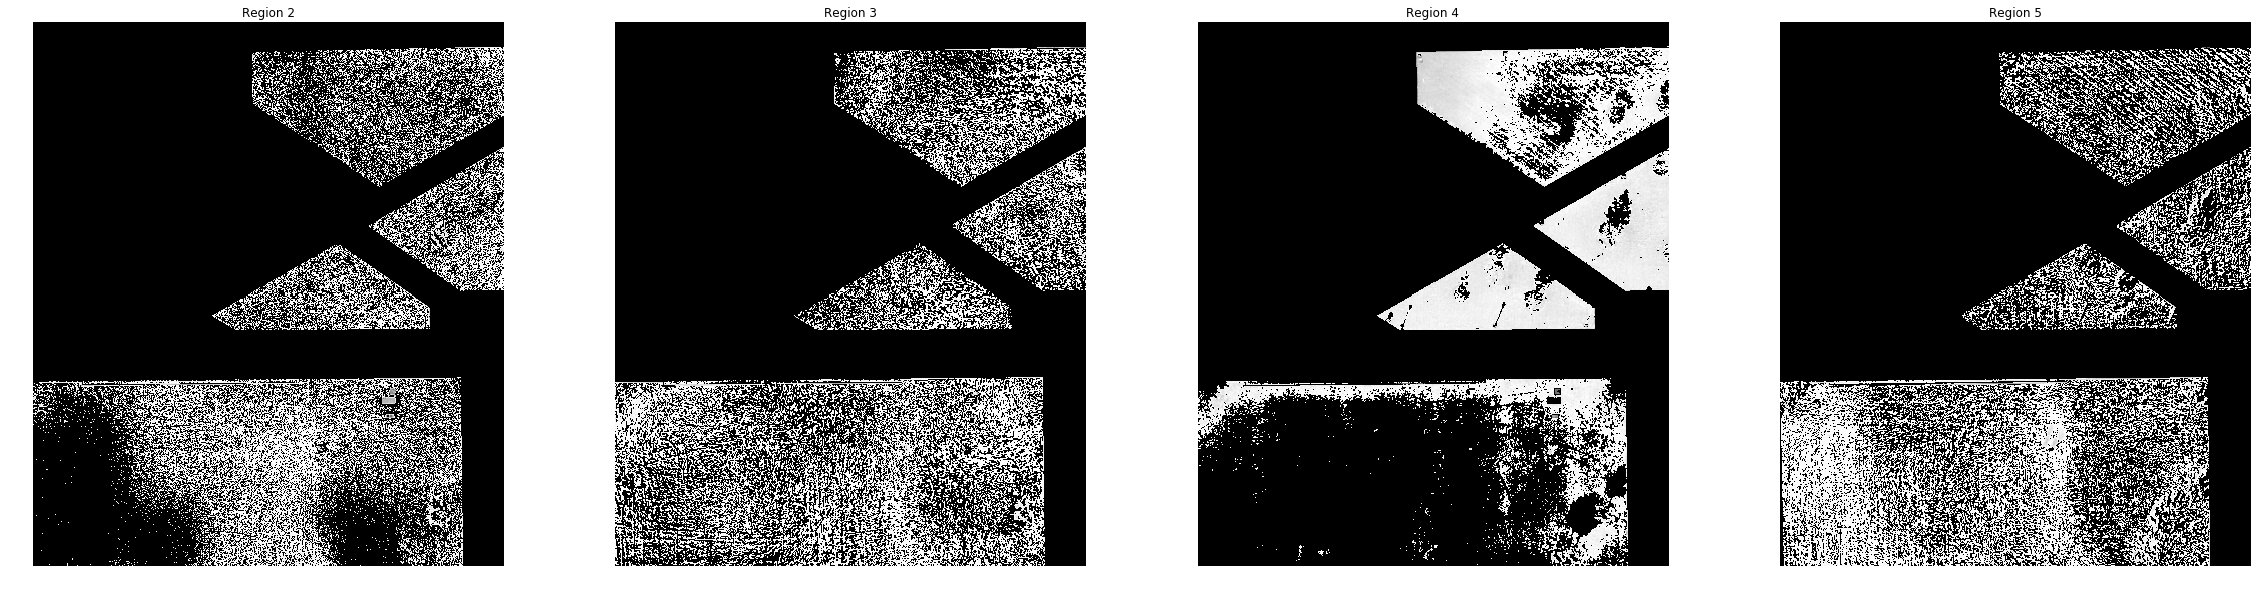

In [25]:
plot_mission_region_sample_images(mission_numbers, mission_images=mission_images, region_images=adjacent_regions_diff, sample_images=sample_images, display_missions=False, display_regions=True, display_samples=False)

In [47]:
# a = np.array([False,True,False])
# print(a)
# print(~a)
# print(np.logical_not(a))

# print(threshold_mask[400:410, 0:10])
# print(np.logical_not(threshold_mask[400:410, 0:10]))

In [31]:
import imutils
from skimage.measure import compare_ssim

imageA = region_images[0]
imageB = region_images[1]
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff*255).astype("uint8")
print("SSIM: {}".format(score)) # [-1, 1] 1 perfect match

SSIM: 0.8599514777903645


In [36]:
thresh = cv2.threshold(diff, 100, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

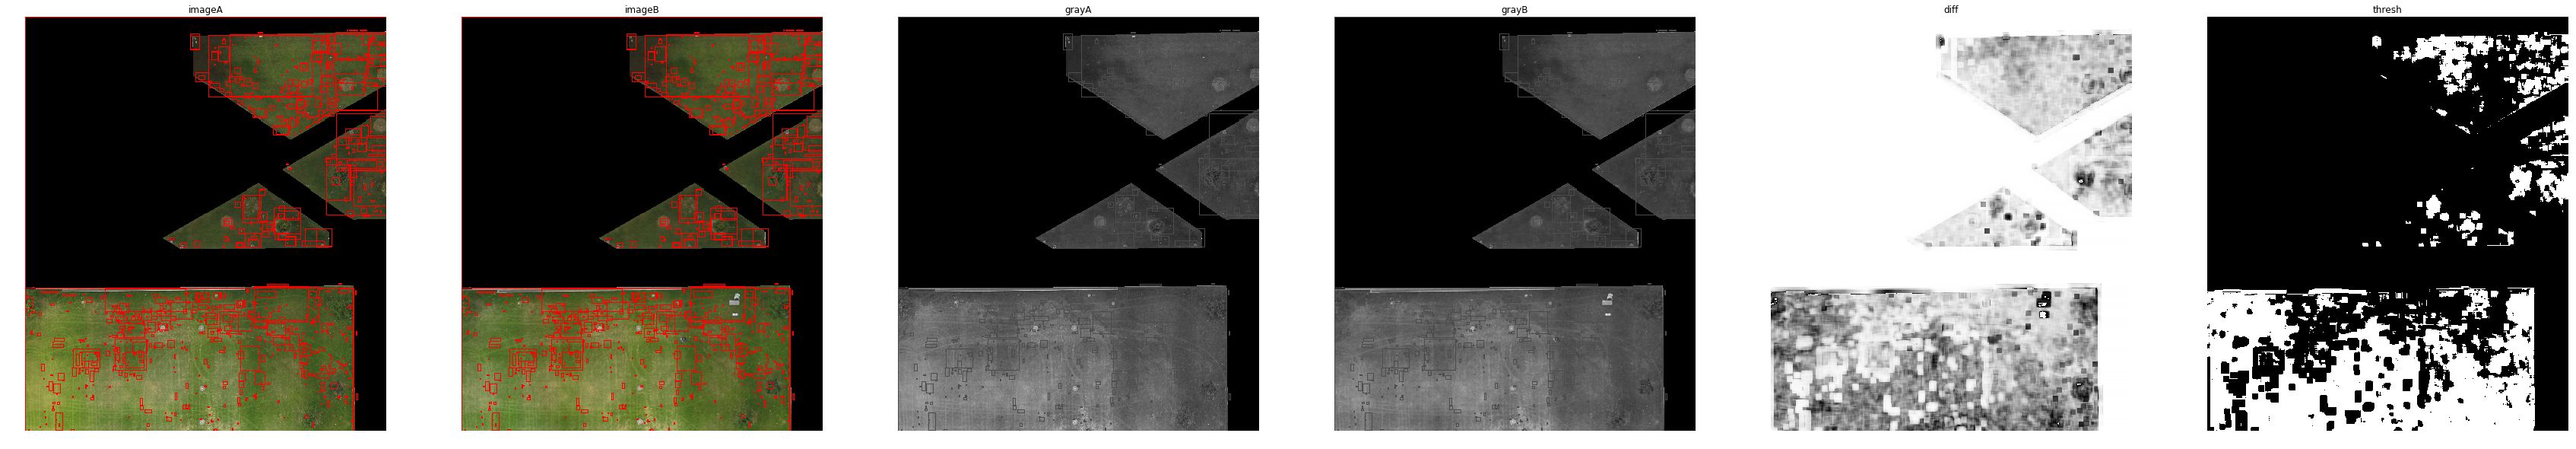

In [37]:
for c in cnts:
    # compute the bounding box of the contour and then draw the
    # bounding box on both input images to represent where the two
    # images differ
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(imageA, (x, y), (x+w, y+h), (0, 0, 255), 1)
    cv2.rectangle(imageB, (x, y), (x+w, y+h), (0, 0, 255), 1)

plot_images([imageA, imageB, grayA, grayB, diff, thresh], ['imageA', 'imageB', 'grayA', 'grayB', 'diff', 'thresh'])

In [1]:
# region_mask = region != [0, 0, 0]
# region_mask = region_mask.astype(np.uint8)*255
# region_mask = region_mask[:, :, 0]

# sample_mask = sample != [0, 0, 0]
# sample_mask = sample_mask.astype(np.uint8)*255
# sample_mask = sample_mask[:, :, 0]

# print(region_mask.shape)
# print(sample_mask.shape)

In [2]:
# plot_images([region_mask, sample_mask], ['region_mask', 'sample_mask'])

In [3]:
# # get pixel mean and covariance

# sample_mask_bool = np.bool_(sample_mask)

# pixel_mean = [np.mean(sample[sample_mask_bool, 0]), np.mean(sample[sample_mask_bool, 1]), np.mean(sample[sample_mask_bool, 2])]
# print(pixel_mean)

# pixel_variance = [np.var(sample[sample_mask_bool, 0]), np.var(sample[sample_mask_bool, 1]), np.var(sample[sample_mask_bool, 2])]
# print(pixel_variance)

# pixel_covariance = np.cov([sample[sample_mask_bool, 0], sample[sample_mask_bool, 1], sample[sample_mask_bool, 2]], rowvar=True)
# print(pixel_covariance)

In [4]:
# print('non zero pixels:', np.sum(region_mask)/255)
# region_mask_bool = np.bool_(region_mask)

# heatmap = np.zeros((H, W, 3))
# heatmap[region_mask_bool, :] = region[region_mask_bool, :] - pixel_mean
# heatmap[region_mask_bool, :] = heatmap[region_mask_bool, :] / pixel_variance
# print(np.min(heatmap), np.max(heatmap))

# heatmap[region_mask_bool, :] = heatmap[region_mask_bool, :] - np.min(heatmap)
# print(np.min(heatmap), np.max(heatmap))
# scale = 255/np.max(heatmap)
# heatmap[region_mask_bool, :] = heatmap[region_mask_bool, :]*scale
# print(np.min(heatmap), np.max(heatmap))


# heatmap = heatmap.astype(np.uint8)
# # heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2GRAY)
# # print(np.min(heatmap), np.max(heatmap))

# plot_images([heatmap], ['heatmap'])

In [5]:
# import seaborn as sb

# sb.heatmap(heatmap)